## Supervised Learning 

This notebook follows the module 2 videos to illustrate an overview of concepts of supervised machine learning


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_friedman1, make_classification

from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


In [ ]:
#load fruit data
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_frits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

cmap_bold = ListedColormap(['#FFFF00', '#00F00', '#0000FF', '#000000'])

#make low-dimensional set 
X_fruits_2d = fruits[['height', 'width']]
y_frits_2d = fruits['fruit_label']

In [ ]:
#synthetic datasets allow for easy low-dimensional visualization
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0, noise=25, random_state=0)

plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

In [ ]:
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50, cmap=cmap_bold)
plt.show()

In [ ]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, 
                                n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=0)
#plt.show()

In [ ]:
#to perform lse linear regression
#linear regression: least-squares ~12 min

#ridge regression is similar to lse linear regression except that it adds a 
#regularizing penalty during training that allows the model to better generalize for new data


#### Feature preprocessing:
Using MinMaxScaler()

In [ ]:
#MinMax scaling
#it is important to first normalize each feature x by translating every value of each feature into a value btw 0 and 1:
#first compute minimum and maximum values for each feature in training data, then for each instance:
#x_in_normal = (x_in - x_in_min)/(x_in_max - x_in_min)

#to do this with a tool in sklearn
from sklearn.preprocessing
"""
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = Ridge().fit(X_train_scaled, y_train)
r2_score = clf.score(X_test_scaled, y_test)
"""

#it can be more efficient to fit and transform together using the fit_transform method on training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


### ridge regression with normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_ssplit(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#items ending in _ are generated from training set
linridge = Ridge(alpha-20.0).fit(X_train_scaled, y_train)
print('dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R=squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_!=0)))
 

In [ ]:
#polynomial regression
poly = PolynomialFeatures(degree-2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)

#variables ending with '_' represent values generated by trained model
linreg = LinearRegression().fit(X_train, y_train)
print(linreg.coef_)
print(linreg.intercept_)

#### Linear Support vector machine

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)



#### Kernelized support vector machines

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)


### Classifier Visualization Playground


The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the UCI Mushroom Data Set stored in mushrooms.csv.

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accu

In [1]:
#%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [2]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

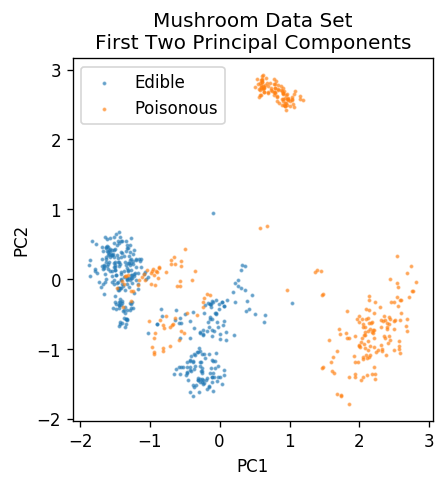

In [3]:
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

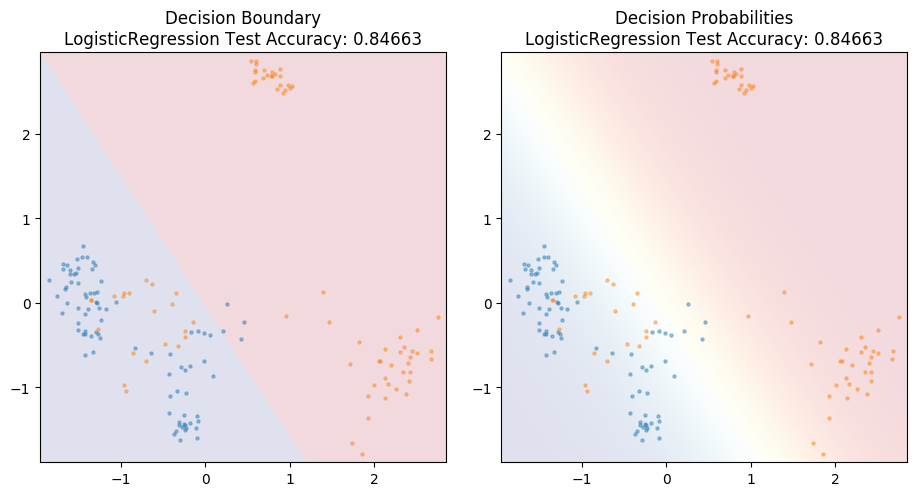

In [5]:
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

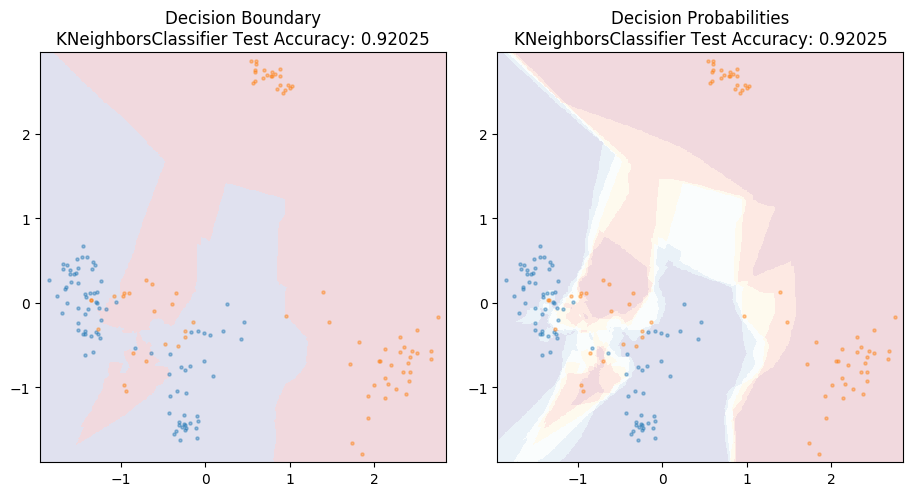

In [8]:
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

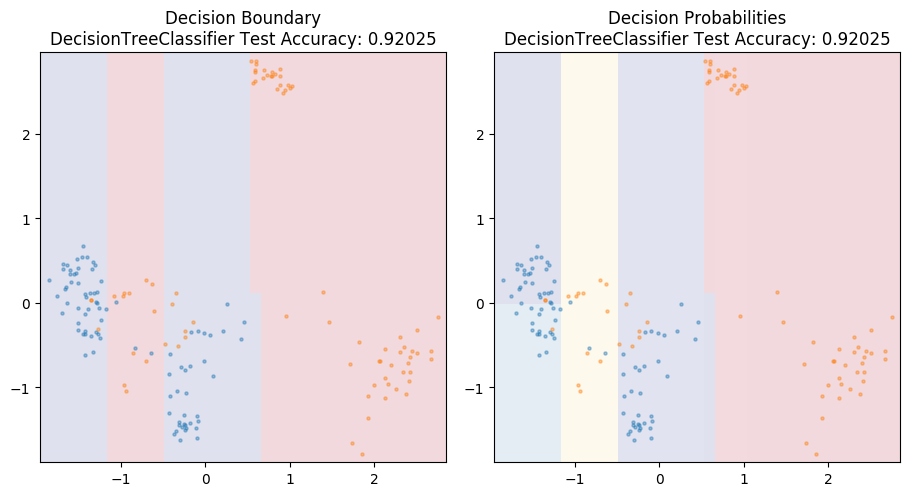

In [11]:
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

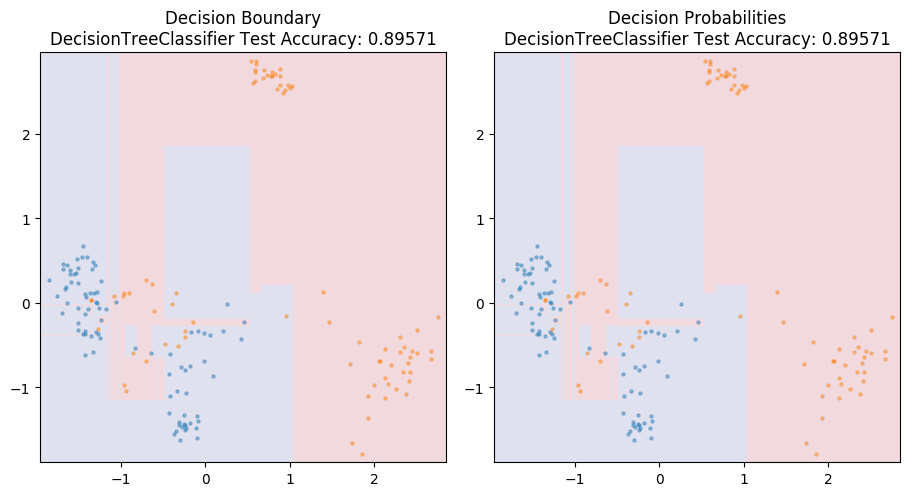

In [14]:
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

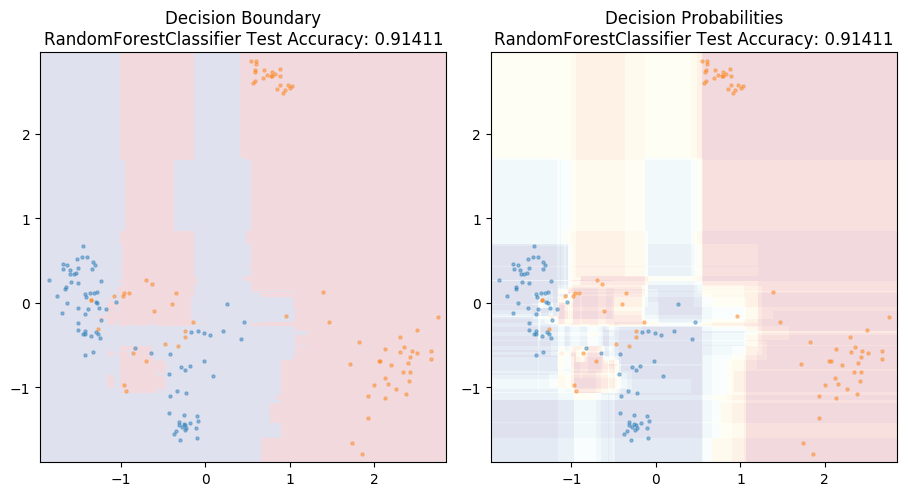

In [16]:
plt.show()

In [17]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

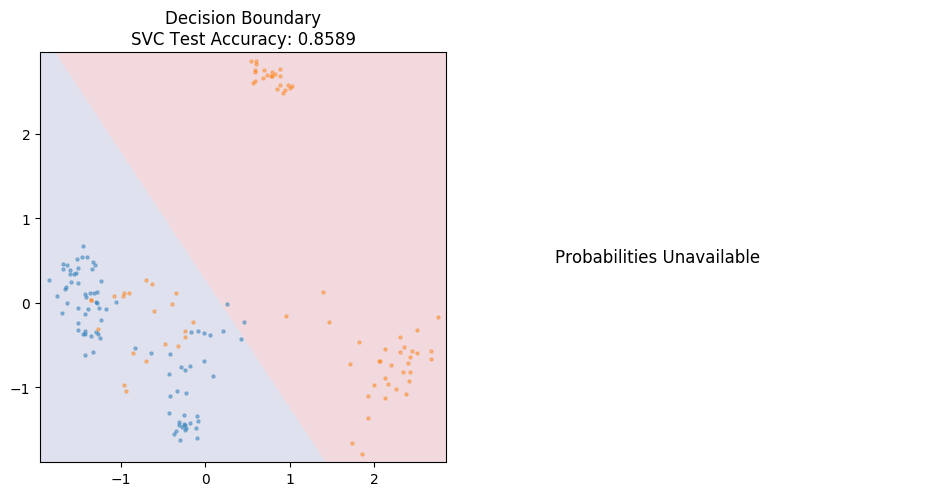

In [18]:
plt.show()

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

In [ ]:
plt.show()